Data Collecting and Cleaning

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from warnings import filterwarnings
filterwarnings(action='ignore')

In [111]:
wine = pd.read_csv("WineQT.csv")
wine.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            6.7              0.58         0.08             1.8      0.097   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 15.0                  65.0   0.9959  3.28       0.54   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4  
5      9.4        5   5  
6      9.4        5   6  
7     10.0        7   7  
8      9.5        7   8  
9      9.2        5  10

In [112]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [113]:
wine.shape

(1143, 13)

In [114]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [28]:
len(wine.columns)

14

In [115]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [116]:
wine.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.250728     0.673157   
volatile acidity          -0.250728          1.000000    -0.544187   
citric acid                0.673157         -0.544187     1.000000   
residual sugar             0.171831         -0.005751     0.175815   
chlorides                  0.107889          0.056336     0.245312   
free sulfur dioxide       -0.164831         -0.001962    -0.057589   
total sulfur dioxide      -0.110628          0.077748     0.036871   
density                    0.681501          0.016512     0.375243   
pH                        -0.685163          0.221492    -0.546339   
sulphates                  0.174592         -0.276079     0.331232   
alcohol                   -0.075055         -0.203909     0.106250   
quality                    0.121970         -0.407394     0.240821   
Id                        -0.275826         -0.007892    -0.139011   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.171831   0.107889            -0.164831   
volatile acidity           -0.005751   0.056336            -0.001962   
citric acid                 0.175815   0.245312            -0.057589   
residual sugar              1.000000   0.070863             0.165339   
chlorides                   0.070863   1.000000             0.015280   
free sulfur dioxide         0.165339   0.015280             1.000000   
total sulfur dioxide        0.190790   0.048163             0.661093   
density                     0.380147   0.208901            -0.054150   
pH                         -0.116959  -0.277759             0.072804   
sulphates                   0.017475   0.374784             0.034445   
alcohol                     0.058421  -0.229917            -0.047095   
quality                     0.022002  -0.124085            -0.063260   
Id                         -0.046344  -0.088099             0.095268   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.110628  0.681501 -0.685163   0.174592   
volatile acidity                  0.077748  0.016512  0.221492  -0.276079   
citric acid                       0.036871  0.375243 -0.546339   0.331232   
residual sugar                    0.190790  0.380147 -0.116959   0.017475   
chlorides                         0.048163  0.208901 -0.277759   0.374784   
free sulfur dioxide               0.661093 -0.054150  0.072804   0.034445   
total sulfur dioxide              1.000000  0.050175 -0.059126   0.026894   
density                           0.050175  1.000000 -0.352775   0.143139   
pH                               -0.059126 -0.352775  1.000000  -0.185499   
sulphates                         0.026894  0.143139 -0.185499   1.000000   
alcohol                          -0.188165 -0.494727  0.225322   0.094421   
quality                          -0.183339 -0.175208 -0.052453   0.257710   
Id                               -0.107389 -0.363926  0.132904  -0.103954   

                       alcohol   quality        Id  
fixed acidity        -0.075055  0.121970 -0.275826  
volatile acidity     -0.203909 -0.407394 -0.007892  
citric acid           0.106250  0.240821 -0.139011  
residual sugar        0.058421  0.022002 -0.046344  
chlorides            -0.229917 -0.124085 -0.088099  
free sulfur dioxide  -0.047095 -0.063260  0.095268  
total sulfur dioxide -0.188165 -0.183339 -0.107389  
density              -0.494727 -0.175208 -0.363926  
pH                    0.225322 -0.052453  0.132904  
sulphates             0.094421  0.257710 -0.103954  
alcohol               1.000000  0.484866  0.238087  
quality               0.484866  1.000000  0.069708  
Id                    0.238087  0.069708  1.000000

In [117]:
wine.count()

fixed acidity           1143
volatile acidity        1143
citric acid             1143
residual sugar          1143
chlorides               1143
free sulfur dioxide     1143
total sulfur dioxide    1143
density                 1143
pH                      1143
sulphates               1143
alcohol                 1143
quality                 1143
Id                      1143
dtype: int64

In [118]:
wine.describe(include='all')

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality           Id  
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043   804.969379  
std       0.156664     0.170399     1.082196     0.805824   463.997116  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.205000     0.550000     9.500000     5.000000   411.000000  
50%       3.310000     0.620000    10.200000     6.000000   794.000000  
75%       3.400000     0.730000    11.100000     6.000000  1209.500000  
max       4.010000     2.000000    14.900000     8.000000  1597.000000

In [119]:
wine.groupby('quality').mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3             8.450000          0.897500     0.211667        2.666667   
4             7.809091          0.700000     0.165758        2.566667   
5             8.161077          0.585280     0.240124        2.540476   
6             8.317749          0.504957     0.263680        2.444805   
7             8.851049          0.393671     0.386573        2.760140   
8             8.806250          0.410000     0.432500        2.643750   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
3         0.105333             8.166667             24.500000  0.997682   
4         0.094788            14.848485             40.606061  0.996669   
5         0.091770            16.612836             55.299172  0.997073   
6         0.085281            15.215368             39.941558  0.996610   
7         0.075217            14.538462             37.489510  0.996071   
8         0.070187            11.062500             29.375000  0.995553   

               pH  sulphates    alcohol           Id  
quality                                               
3        3.361667   0.550000   9.691667  1121.166667  
4        3.391212   0.637879  10.260606   692.848485  
5        3.302091   0.613375   9.902277   753.925466  
6        3.323788   0.676537  10.655339   854.625541  
7        3.287133   0.743566  11.482634   830.349650  
8        3.240625   0.766250  11.937500   797.875000

Chemical Qualities

In [120]:
correlations = wine.corr()
print(correlations['quality'])

fixed acidity           0.121970
volatile acidity       -0.407394
citric acid             0.240821
residual sugar          0.022002
chlorides              -0.124085
free sulfur dioxide    -0.063260
total sulfur dioxide   -0.183339
density                -0.175208
pH                     -0.052453
sulphates               0.257710
alcohol                 0.484866
quality                 1.000000
Id                      0.069708
Name: quality, dtype: float64


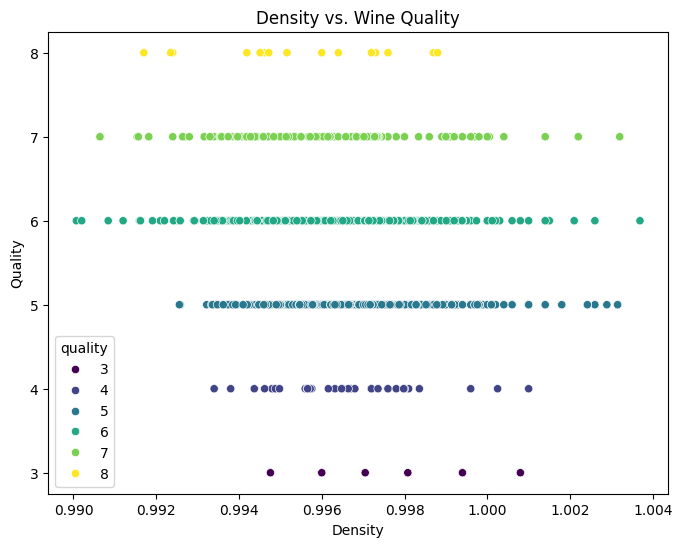

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(x='density', y='quality', data=wine, hue='quality', palette='viridis')
plt.title('Density vs. Wine Quality')
plt.xlabel('Density')
plt.ylabel('Quality')
plt.show()

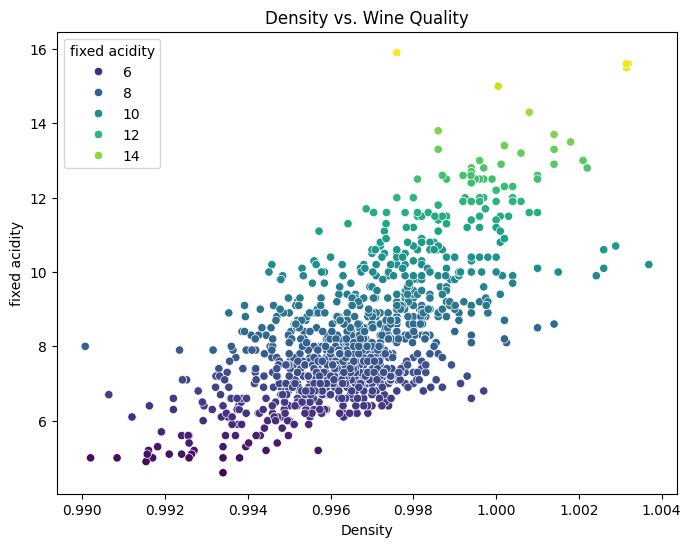

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(x='density', y='fixed acidity', data=wine, hue='fixed acidity', palette='viridis')
plt.title('Density vs. Wine Quality')
plt.xlabel('Density')
plt.ylabel('fixed acidity')
plt.show()

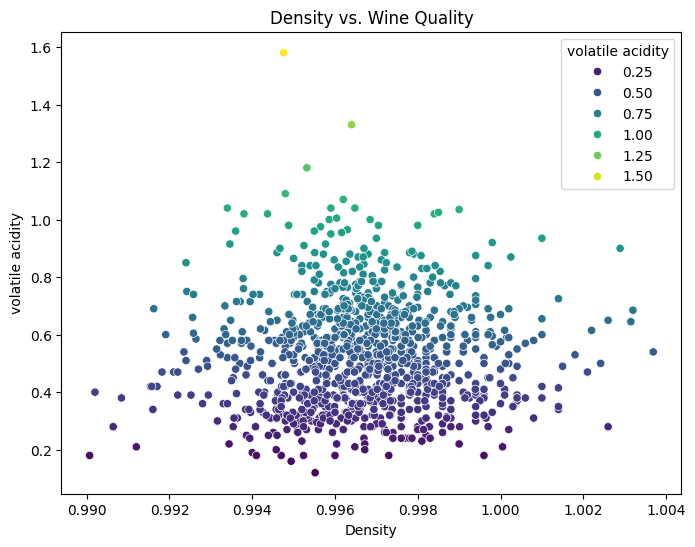

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(x='density', y='volatile acidity', data=wine, hue='volatile acidity', palette='viridis')
plt.title('Density vs. Wine Quality')
plt.xlabel('Density')
plt.ylabel('volatile acidity')
plt.show()

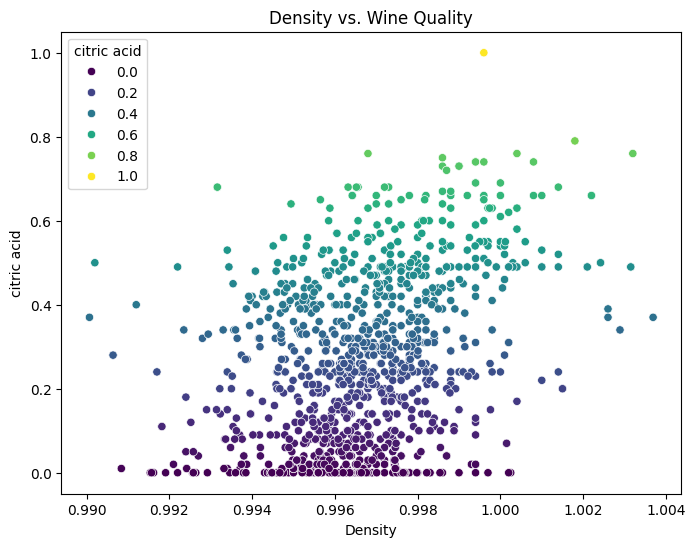

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(x='density', y='citric acid', data=wine, hue='citric acid', palette='viridis')
plt.title('Density vs. Wine Quality')
plt.xlabel('Density')
plt.ylabel('citric acid')
plt.show()

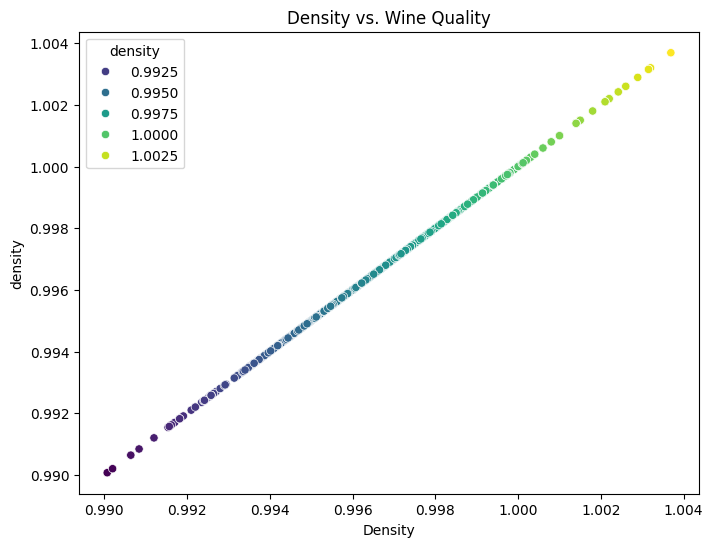

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(x='density', y='density', data=wine, hue='density', palette='viridis')
plt.title('Density vs. Wine Quality')
plt.xlabel('Density')
plt.ylabel('density')
plt.show()

<Axes: xlabel='quality', ylabel='Density'>

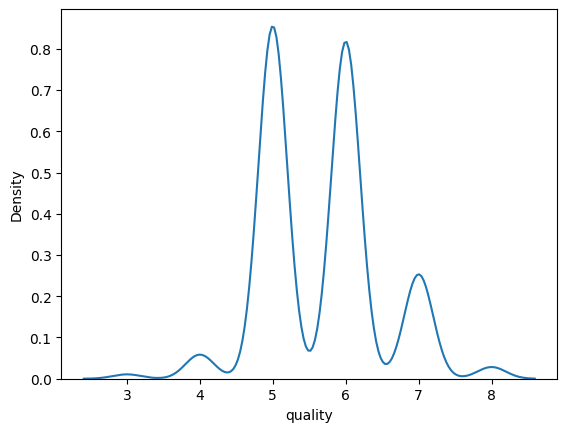

In [126]:
sns.kdeplot(wine.query('quality > 2').quality)

<Axes: xlabel='alcohol', ylabel='Density'>

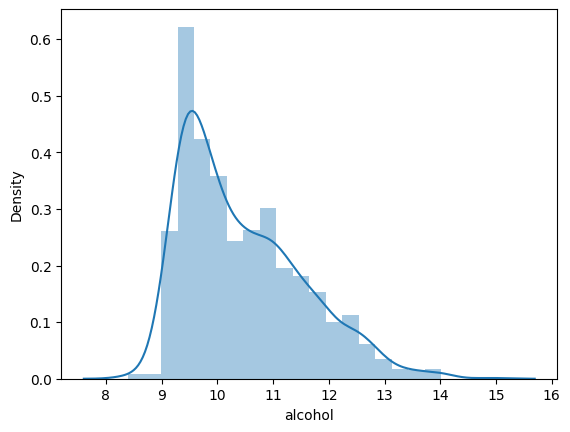

In [127]:
sns.distplot(wine['alcohol'])

fixed acidity              Axes(0.125,0.712609;0.168478x0.167391)
volatile acidity        Axes(0.327174,0.712609;0.168478x0.167391)
citric acid             Axes(0.529348,0.712609;0.168478x0.167391)
residual sugar          Axes(0.731522,0.712609;0.168478x0.167391)
chlorides                  Axes(0.125,0.511739;0.168478x0.167391)
free sulfur dioxide     Axes(0.327174,0.511739;0.168478x0.167391)
total sulfur dioxide    Axes(0.529348,0.511739;0.168478x0.167391)
density                 Axes(0.731522,0.511739;0.168478x0.167391)
pH                          Axes(0.125,0.31087;0.168478x0.167391)
sulphates                Axes(0.327174,0.31087;0.168478x0.167391)
alcohol                  Axes(0.529348,0.31087;0.168478x0.167391)
quality                  Axes(0.731522,0.31087;0.168478x0.167391)
Id                             Axes(0.125,0.11;0.168478x0.167391)
dtype: object

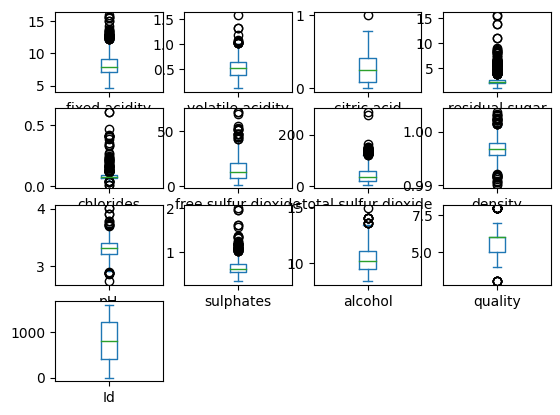

In [128]:
wine.plot(kind ='box',subplots = True, layout =(4,4),sharex = False)

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

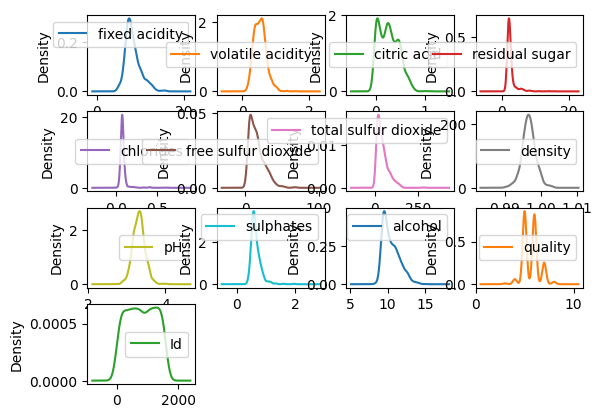

In [129]:
wine.plot(kind ='density',subplots = True, layout =(4,4),sharex = False)

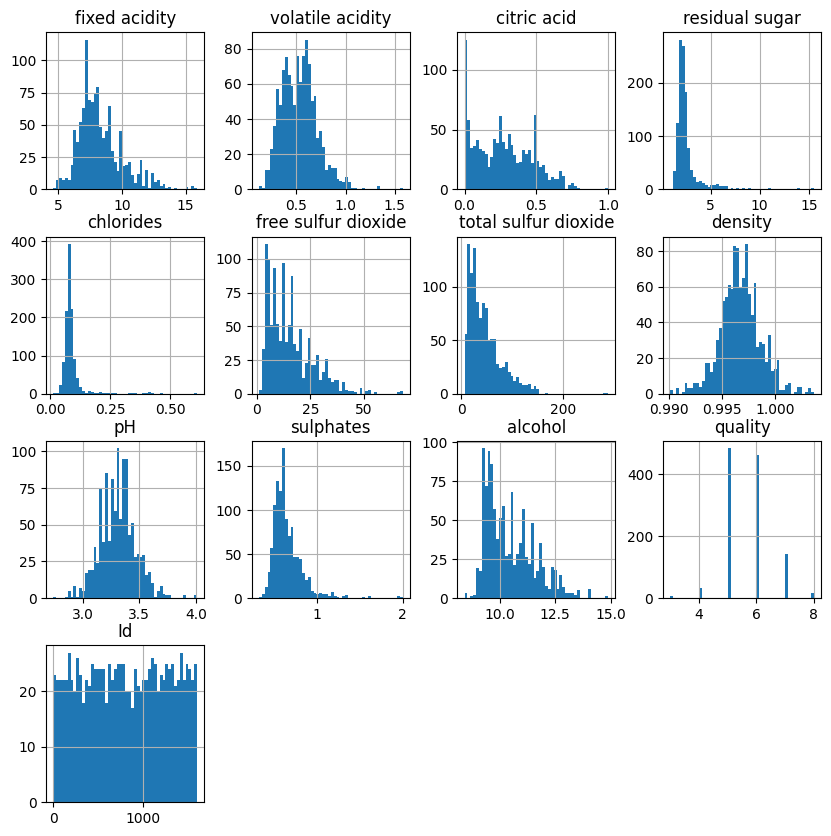

In [130]:
wine.hist(figsize=(10,10),bins=50)
plt.show()

<Axes: >

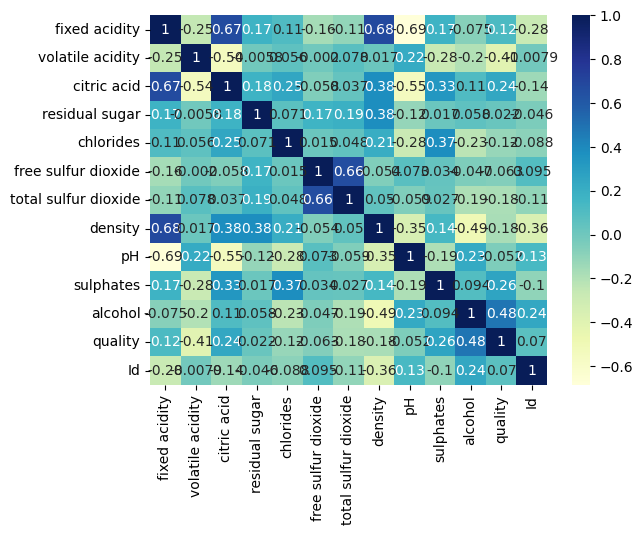

In [131]:
corr = wine.corr()
sns.heatmap(corr,annot=True, cmap='YlGnBu')

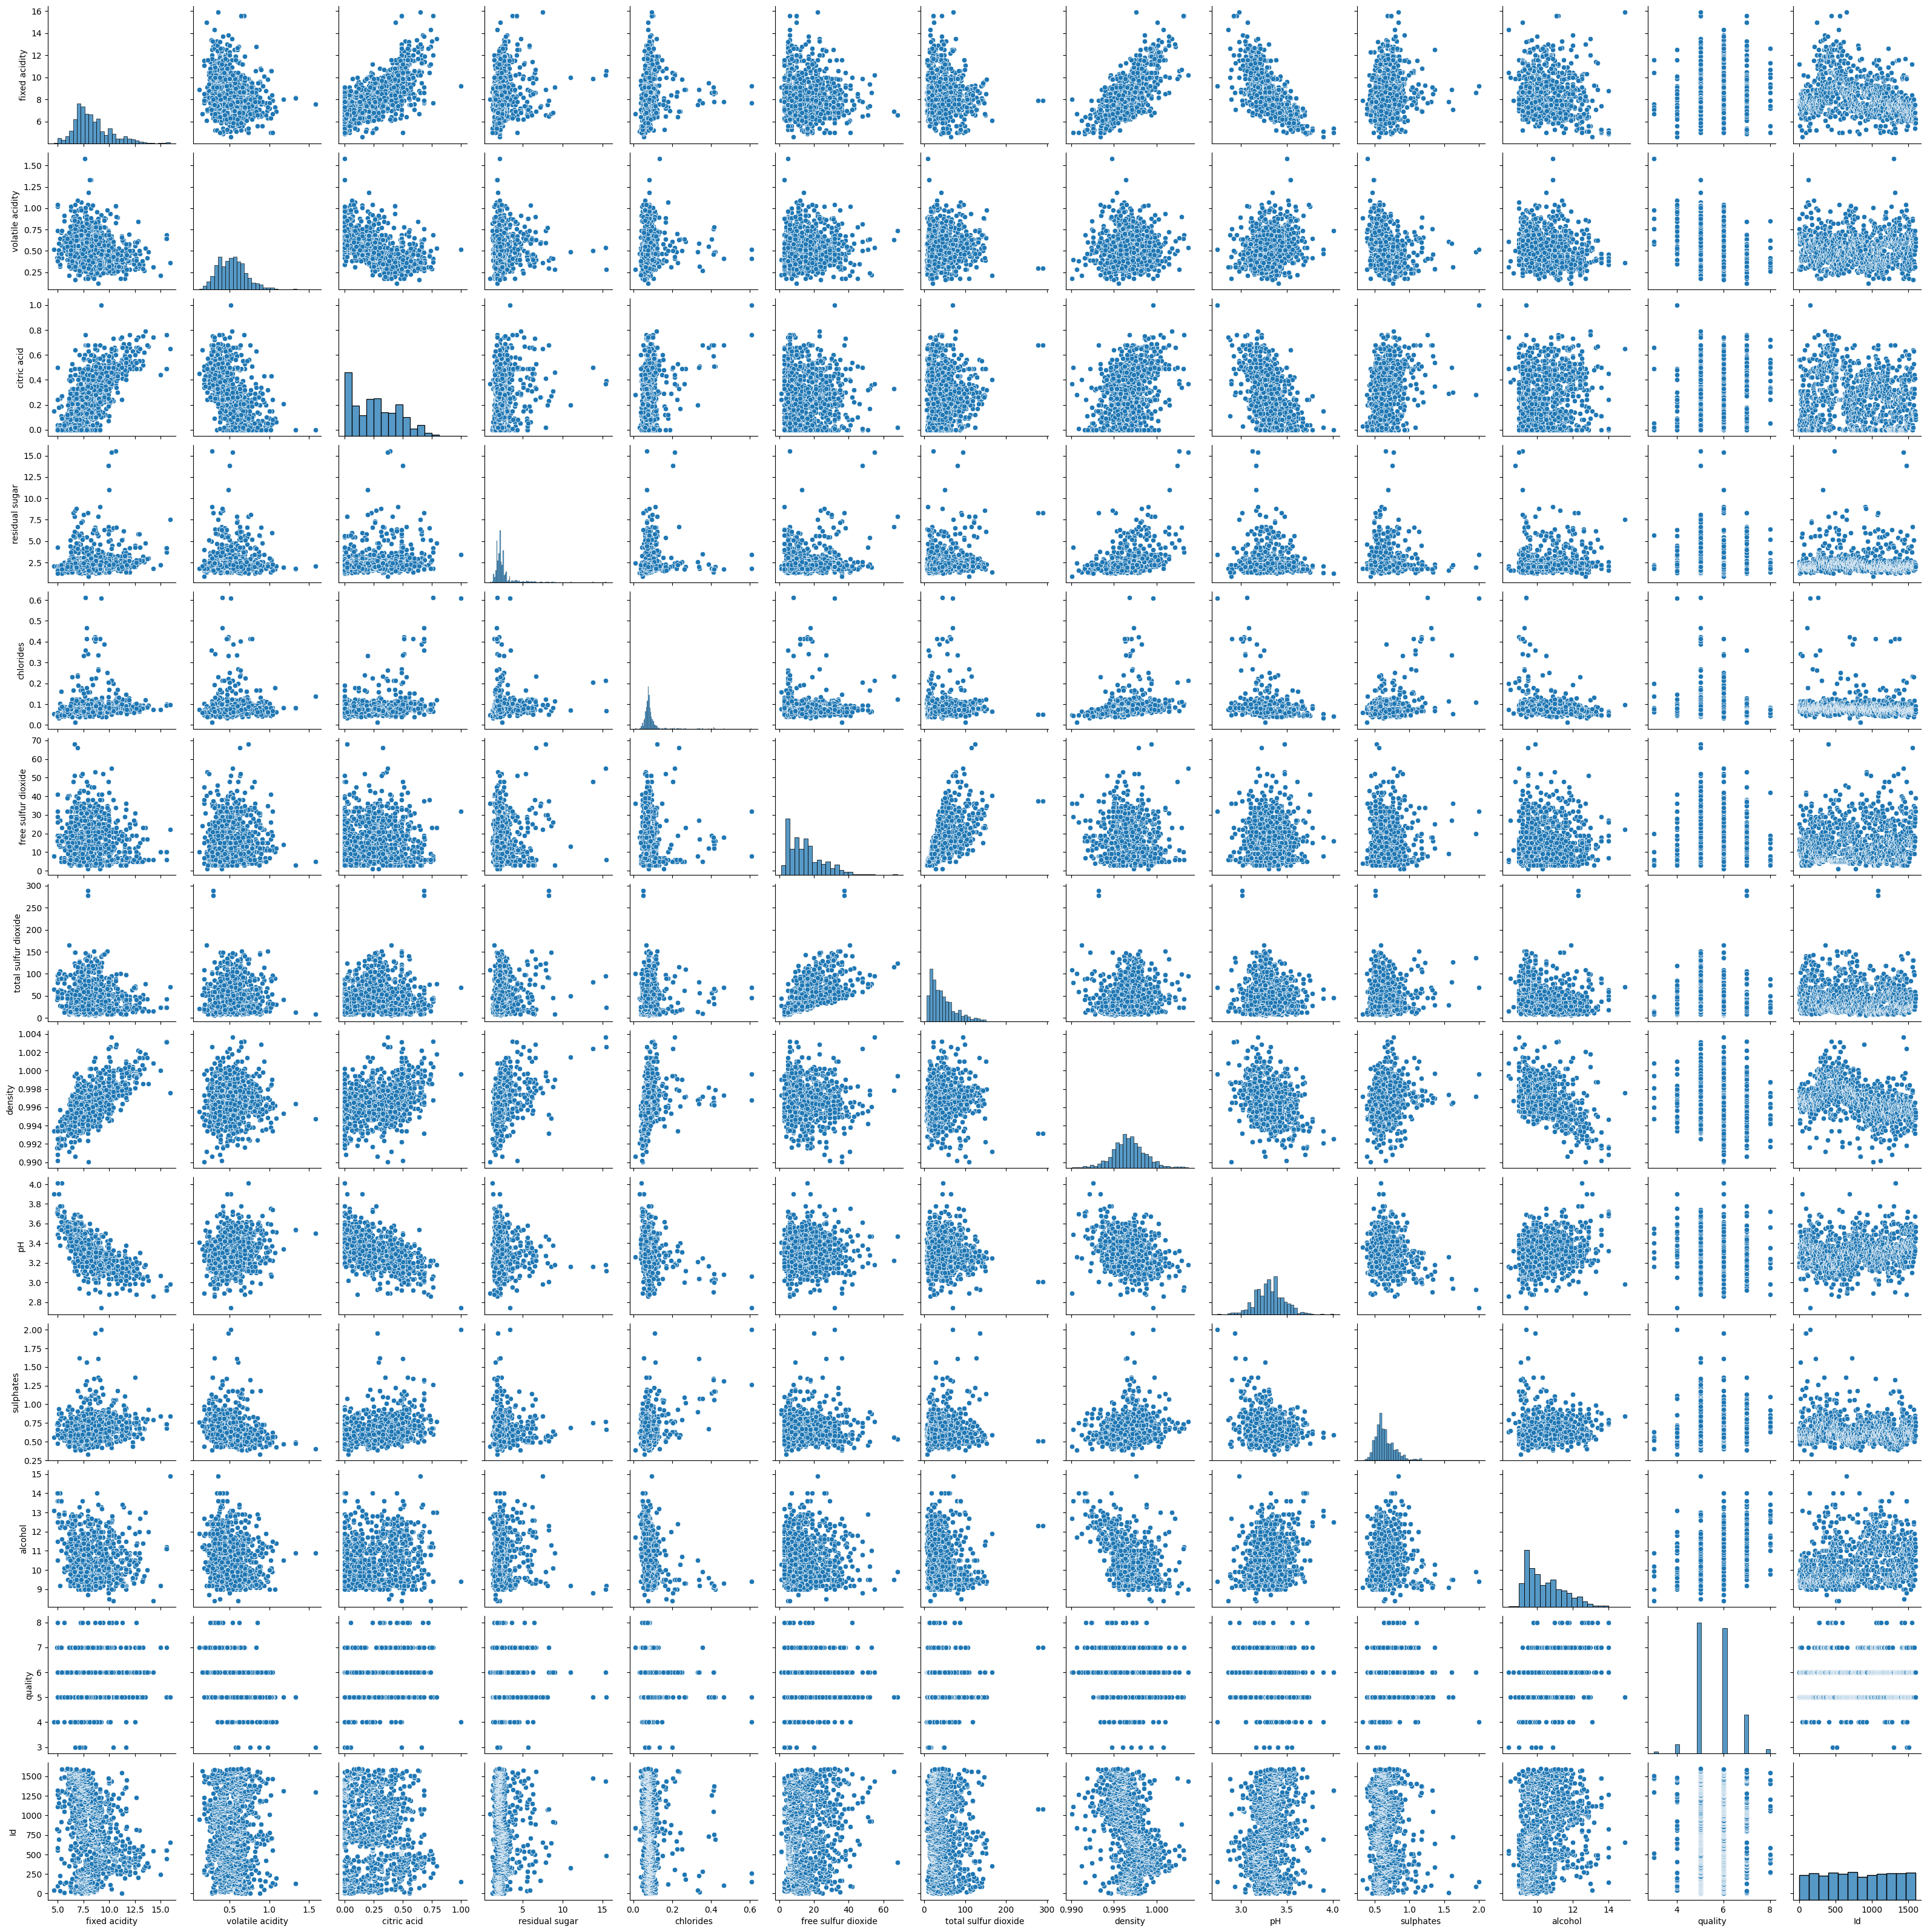

In [132]:
sns.pairplot(wine)

<Axes: xlabel='quality', ylabel='alcohol'>

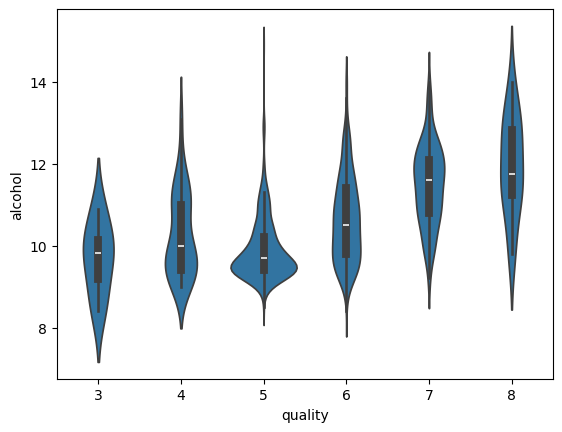

In [133]:
sns.violinplot(x='quality', y='alcohol', data=wine )

Classifier Models

In [134]:
wine['goodquality'] = [1 if x >= 7 else 0 for x in wine['quality']]
X = wine.drop(['quality','goodquality'], axis = 1)
Y = wine['goodquality']

In [135]:
wine['goodquality'].value_counts()

goodquality
0    984
1    159
Name: count, dtype: int64

In [136]:
X.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            6.7              0.58         0.08             1.8      0.097   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 15.0                  65.0   0.9959  3.28       0.54   

   alcohol  Id  
0      9.4   0  
1      9.8   1  
2      9.8   2  
3      9.8   3  
4      9.4   4  
5      9.4   5  
6      9.4   6  
7     10.0   7  
8      9.5   8  
9      9.2  10

In [137]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: goodquality, Length: 1143, dtype: int64


In [138]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
from sklearn.ensemble import ExtraTreesClassifier
classifiern = ExtraTreesClassifier()
classifiern.fit(X,Y)
score = classifiern.feature_importances_
print(score)

[0.07022365 0.10181363 0.09524455 0.06891887 0.06240204 0.06059432
 0.07132664 0.08350854 0.06189584 0.10206799 0.15487632 0.06712759]


LOGISTIC REGRESSION

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

In [140]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(Y_test,Y_pred))

Accuracy Score: 0.8862973760932945


In [141]:
confusion_mat = confusion_matrix(Y_test,Y_pred)
print(confusion_mat)

[[289   9]
 [ 30  15]]


 KNN

In [142]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Accuracy Score: 0.8017492711370262


SVC

In [143]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,Y_train)
pred_y = model.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,pred_y))

Accuracy Score: 0.8688046647230321


DECISION TREE

In [144]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',random_state=7)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Accuracy Score: 0.880466472303207


GUSSIANNB

In [145]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train,Y_train)
y_pred3 = model3.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred3))

Accuracy Score: 0.8483965014577259


RANDOM FOREST

In [146]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, Y_train)
y_pred2 = model2.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred2))

Accuracy Score: 0.8950437317784257


XGBOOST

In [147]:
import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=1)
model5.fit(X_train, Y_train)
y_pred5 = model5.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred5))

Accuracy Score: 0.8892128279883382


In [148]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','KNN', 'SVC','Decision Tree' ,'GaussianNB','Random Forest','Xgboost'],
    'Score': [0.886,0.872,0.801,0.880,0.848,0.895,0.889]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df


Model
Score                     
0.895        Random Forest
0.889              Xgboost
0.886  Logistic Regression
0.880        Decision Tree
0.872                  KNN
0.848           GaussianNB
0.801                  SVC

Data Analysis Libraries

In [149]:
import numpy as np
import pandas as pd

In [150]:
wine = pd.read_csv("WineQT.csv")
wine.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            6.7              0.58         0.08             1.8      0.097   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 15.0                  65.0   0.9959  3.28       0.54   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4  
5      9.4        5   5  
6      9.4        5   6  
7     10.0        7   7  
8      9.5        7   8  
9      9.2        5  10

In [151]:
wine.fillna(0, inplace=True)

In [152]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [153]:
wine.drop_duplicates(inplace=True)

In [154]:
wine.dropna(inplace=True)

In [155]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [156]:
len(wine)

1143

In [157]:
wine.value_counts()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density  pH    sulphates  alcohol  quality  Id  
4.6            0.52              0.15         2.1             0.054      8.0                  65.0                  0.99340  3.90  0.56       13.1     4        45      1
8.7            0.54              0.26         2.5             0.097      7.0                  31.0                  0.99760  3.27  0.60       9.3      6        630     1
               0.70              0.24         2.5             0.226      5.0                  15.0                  0.99910  3.32  0.60       9.0      6        567     1
               0.69              0.31         3.0             0.086      23.0                 81.0                  1.00020  3.48  0.74       11.6     6        499     1
                                                                                                                                                                493     1
                                                                                                                                                                       ..
7.4            0.53              0.26         2.0             0.101      16.0                 72.0                  0.99570  3.15  0.57       9.4      5        221     1
               0.55              0.19         1.8             0.082      15.0                 34.0                  0.99655  3.49  0.68       10.5     5        1245    1
               0.58              0.00         2.0             0.064      7.0                  11.0                  0.99562  3.45  0.58       11.3     6        985     1
               0.60              0.26         2.1             0.083      17.0                 91.0                  0.99616  3.29  0.56       9.8      6        1329    1
15.9           0.36              0.65         7.5             0.096      22.0                 71.0                  0.99760  2.98  0.84       14.9     5        652     1
Name: count, Length: 1143, dtype: int64

In [158]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
wine['density_scaled'] = scaler.fit_transform(wine['density'].values.reshape(-1, 1))

Data Visualization

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_venn as venn
from math import pi
from pandas.plotting import parallel_coordinates
import plotly.graph_objs as go
import plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk('WineQT.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [160]:
dictionary = {"column1":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
              "column2":[1,2,3,4,np.nan,6,7,8,np.nan,10,np.nan,12,13,14,15,16,np.nan,18,np.nan,20],
              "column3":[1,2,3,4,np.nan,6,7,8,9,10,11,12,13,np.nan,15,16,17,18,np.nan,20]}
data_missingno = pd.DataFrame(dictionary)

In [161]:
data_missingno.head(10)

column1  column2  column3
0        1      1.0      1.0
1        2      2.0      2.0
2        3      3.0      3.0
3        4      4.0      4.0
4        5      NaN      NaN
5        6      6.0      6.0
6        7      7.0      7.0
7        8      8.0      8.0
8        9      NaN      9.0
9       10     10.0     10.0

MATPLOTLIBRARIES

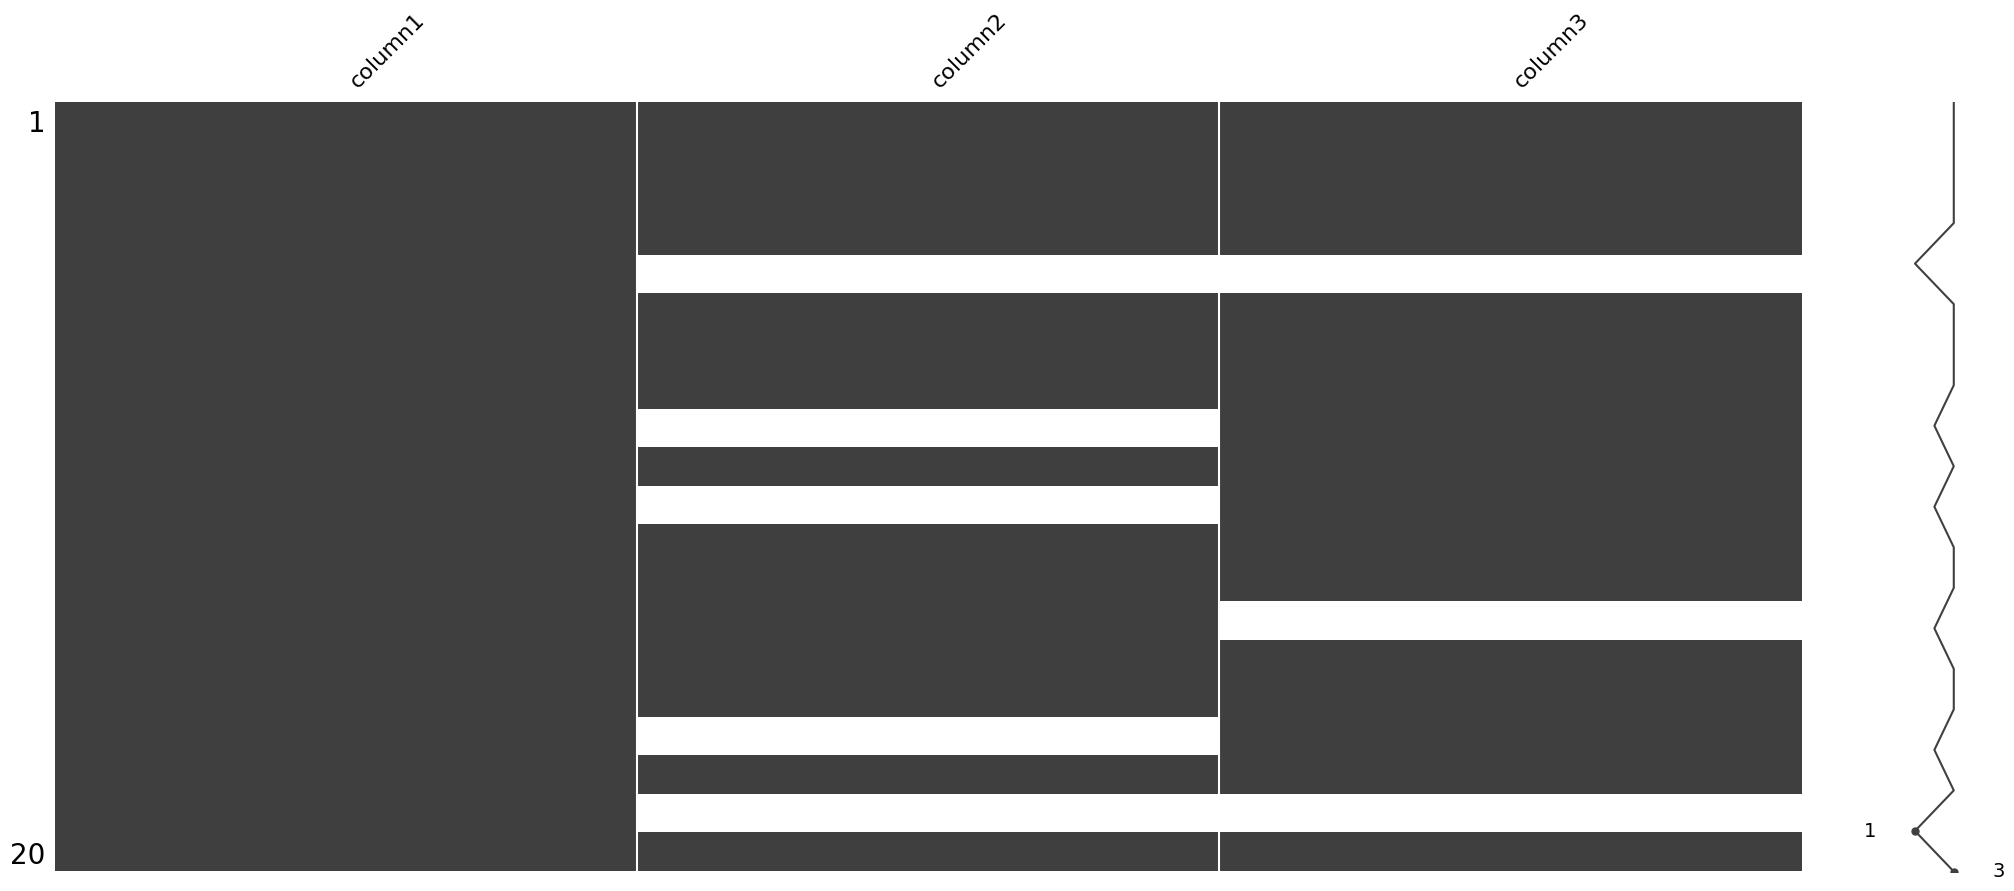

In [162]:
import missingno as msno
msno.matrix(data_missingno)
plt.show()

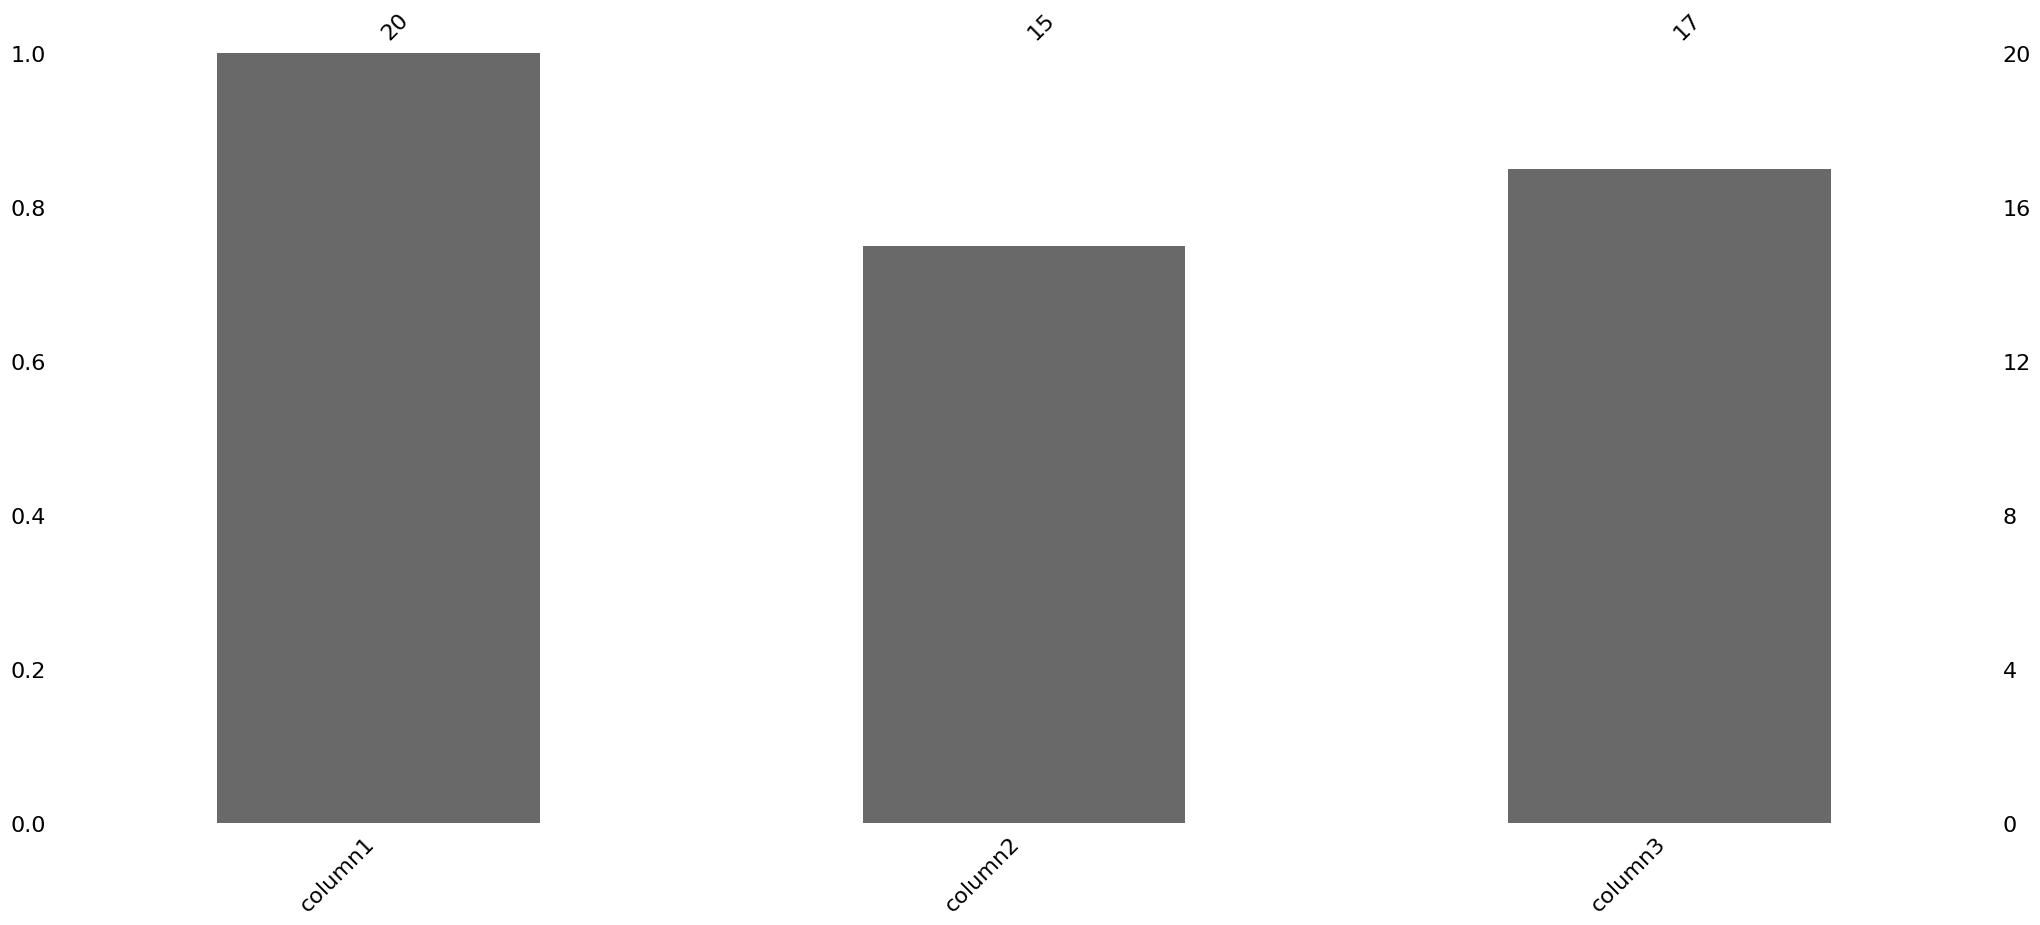

In [163]:
msno.bar(data_missingno)
plt.show()

In [164]:
data = pd.read_csv('WineQT.csv')
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

In [165]:
data.rename(columns = {'fixed acidity': 'fixed_acidity', 'volatile acidity': 'volatile_acidity', 'citric acid': 'citric_acid', 'residual sugar': 'residual_sugar',
       'free sulfur dioxide': 'free_sulfur_dioxide', 'total sulfur dioxide': 'total_sulfur_dioxide'}, inplace=True)
data.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1143 non-null   float64
 1   volatile_acidity      1143 non-null   float64
 2   citric_acid           1143 non-null   float64
 3   residual_sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free_sulfur_dioxide   1143 non-null   float64
 6   total_sulfur_dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


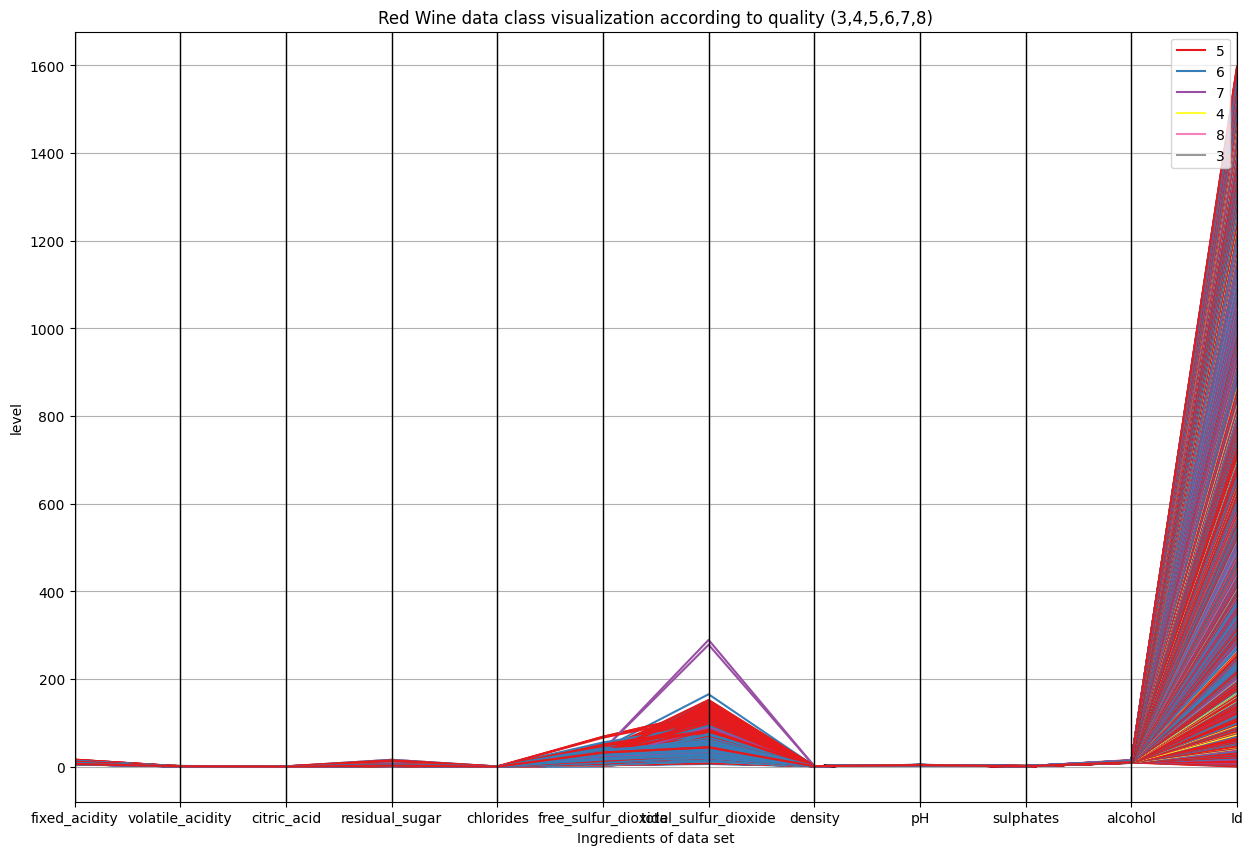

In [167]:
plt.figure(figsize=(15,10))
parallel_coordinates(data, 'quality', colormap=plt.get_cmap("Set1"))
plt.title("Red Wine data class visualization according to quality (3,4,5,6,7,8)")
plt.xlabel("Ingredients of data set")
plt.ylabel("level")
plt.savefig('graph.png')
plt.show()

In [168]:
corr = data.iloc[:,0:10].corr()
corr

fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000         -0.250728     0.673157   
volatile_acidity          -0.250728          1.000000    -0.544187   
citric_acid                0.673157         -0.544187     1.000000   
residual_sugar             0.171831         -0.005751     0.175815   
chlorides                  0.107889          0.056336     0.245312   
free_sulfur_dioxide       -0.164831         -0.001962    -0.057589   
total_sulfur_dioxide      -0.110628          0.077748     0.036871   
density                    0.681501          0.016512     0.375243   
pH                        -0.685163          0.221492    -0.546339   
sulphates                  0.174592         -0.276079     0.331232   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity               0.171831   0.107889            -0.164831   
volatile_acidity           -0.005751   0.056336            -0.001962   
citric_acid                 0.175815   0.245312            -0.057589   
residual_sugar              1.000000   0.070863             0.165339   
chlorides                   0.070863   1.000000             0.015280   
free_sulfur_dioxide         0.165339   0.015280             1.000000   
total_sulfur_dioxide        0.190790   0.048163             0.661093   
density                     0.380147   0.208901            -0.054150   
pH                         -0.116959  -0.277759             0.072804   
sulphates                   0.017475   0.374784             0.034445   

                      total_sulfur_dioxide   density        pH  sulphates  
fixed_acidity                    -0.110628  0.681501 -0.685163   0.174592  
volatile_acidity                  0.077748  0.016512  0.221492  -0.276079  
citric_acid                       0.036871  0.375243 -0.546339   0.331232  
residual_sugar                    0.190790  0.380147 -0.116959   0.017475  
chlorides                         0.048163  0.208901 -0.277759   0.374784  
free_sulfur_dioxide               0.661093 -0.054150  0.072804   0.034445  
total_sulfur_dioxide              1.000000  0.050175 -0.059126   0.026894  
density                           0.050175  1.000000 -0.352775   0.143139  
pH                               -0.059126 -0.352775  1.000000  -0.185499  
sulphates                         0.026894  0.143139 -0.185499   1.000000

In [169]:
import networkx as nx
links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']
links.head(10)

var1                  var2     value
0  fixed_acidity         fixed_acidity  1.000000
1  fixed_acidity      volatile_acidity -0.250728
2  fixed_acidity           citric_acid  0.673157
3  fixed_acidity        residual_sugar  0.171831
4  fixed_acidity             chlorides  0.107889
5  fixed_acidity   free_sulfur_dioxide -0.164831
6  fixed_acidity  total_sulfur_dioxide -0.110628
7  fixed_acidity               density  0.681501
8  fixed_acidity                    pH -0.685163
9  fixed_acidity             sulphates  0.174592

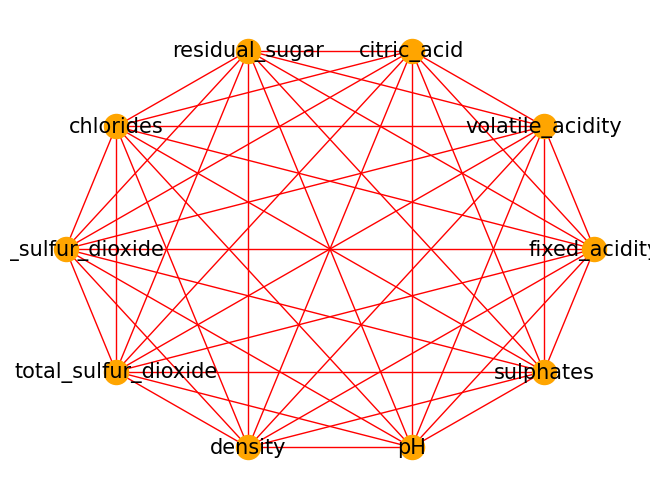

In [170]:
threshold = -1
links_filtered=links.loc[ (links['value'] >= threshold ) & (links['var1'] != links['var2']) ]
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
nx.draw_circular(G, with_labels=True, node_color='orange', node_size=300, edge_color='red', linewidths=1, font_size=15)

In [171]:
data.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

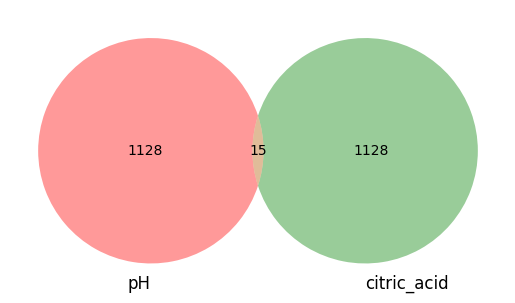

In [172]:
from matplotlib_venn import venn2
pH = data.iloc[:,0]
citric_acid = data.iloc[:,1]
residual_sugar = data.iloc[:,2]
chlorides = data.iloc[:,3]
density = data.iloc[:,4]
venn2(subsets = (len(pH)-15, len(citric_acid)-15, 15), set_labels = ('pH', 'citric_acid'))
plt.show()

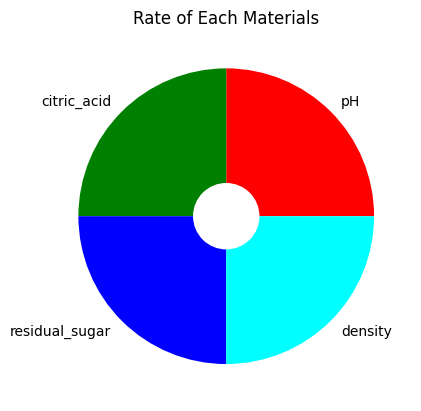

In [173]:
feature_names = "pH","citric_acid","residual_sugar","density"
feature_size = [len(pH),len(citric_acid),len(residual_sugar),len(density)]
circle = plt.Circle((0,0),0.22,color = "white")
plt.pie(feature_size, labels = feature_names, colors = ["red","green","blue","cyan"] )
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Rate of Each Materials")
plt.show()

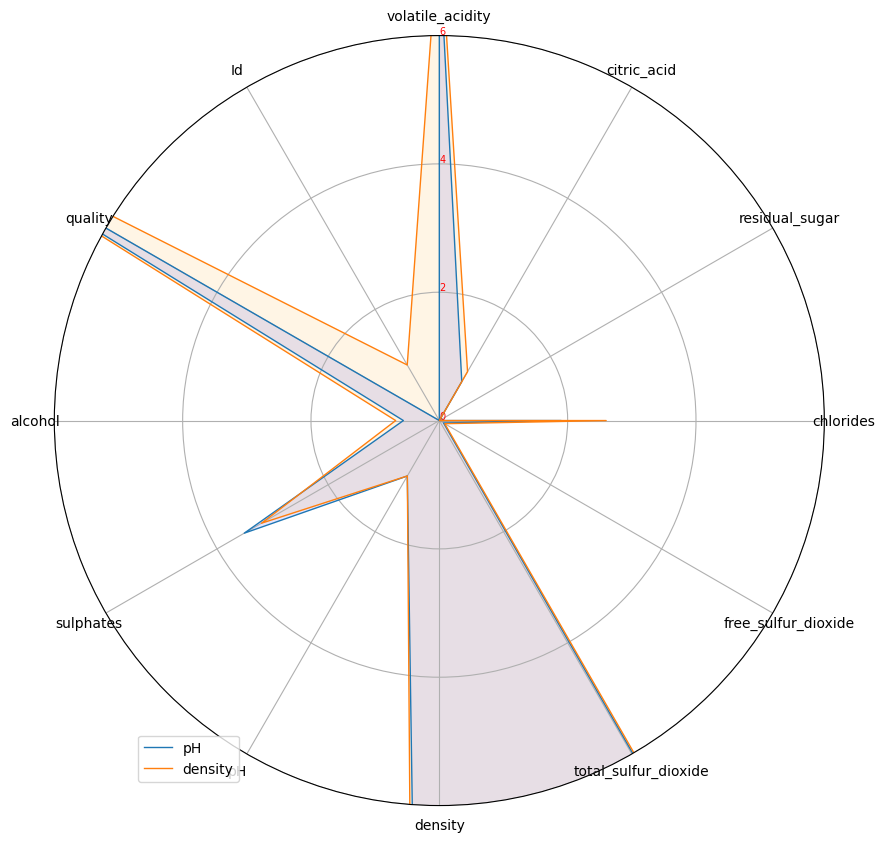

In [174]:
categories = list(data)[1:]
N = len(categories)
angles = [ n / float(N)*2*pi for n in range(N)]
angles = angles + angles[:1]
plt.figure(figsize = (10,10))
ax = plt.subplot(111,polar = True)
ax.set_theta_offset(pi/2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1],categories)
ax.set_rlabel_position(0)
plt.yticks([0,2,4,6],["0","2","4","6"],color= "red", size = 7)
plt.ylim(0,6)

values = data.loc[0].drop("quality").values.flatten().tolist()
values = values + values[:1]
ax.plot(angles,values,linewidth = 1,linestyle="solid",label ="pH" )
ax.fill(angles,values,"b",alpha=0.1)

values = data.loc[1].drop("quality").values.flatten().tolist()
values = values + values[:1]
ax.plot(angles,values,linewidth = 1,linestyle="solid",label ="density" )
ax.fill(angles,values,"orange",alpha=0.1)
plt.legend(loc = "upper left",bbox_to_anchor = (0.1,0.1))
plt.show()

SEABORN

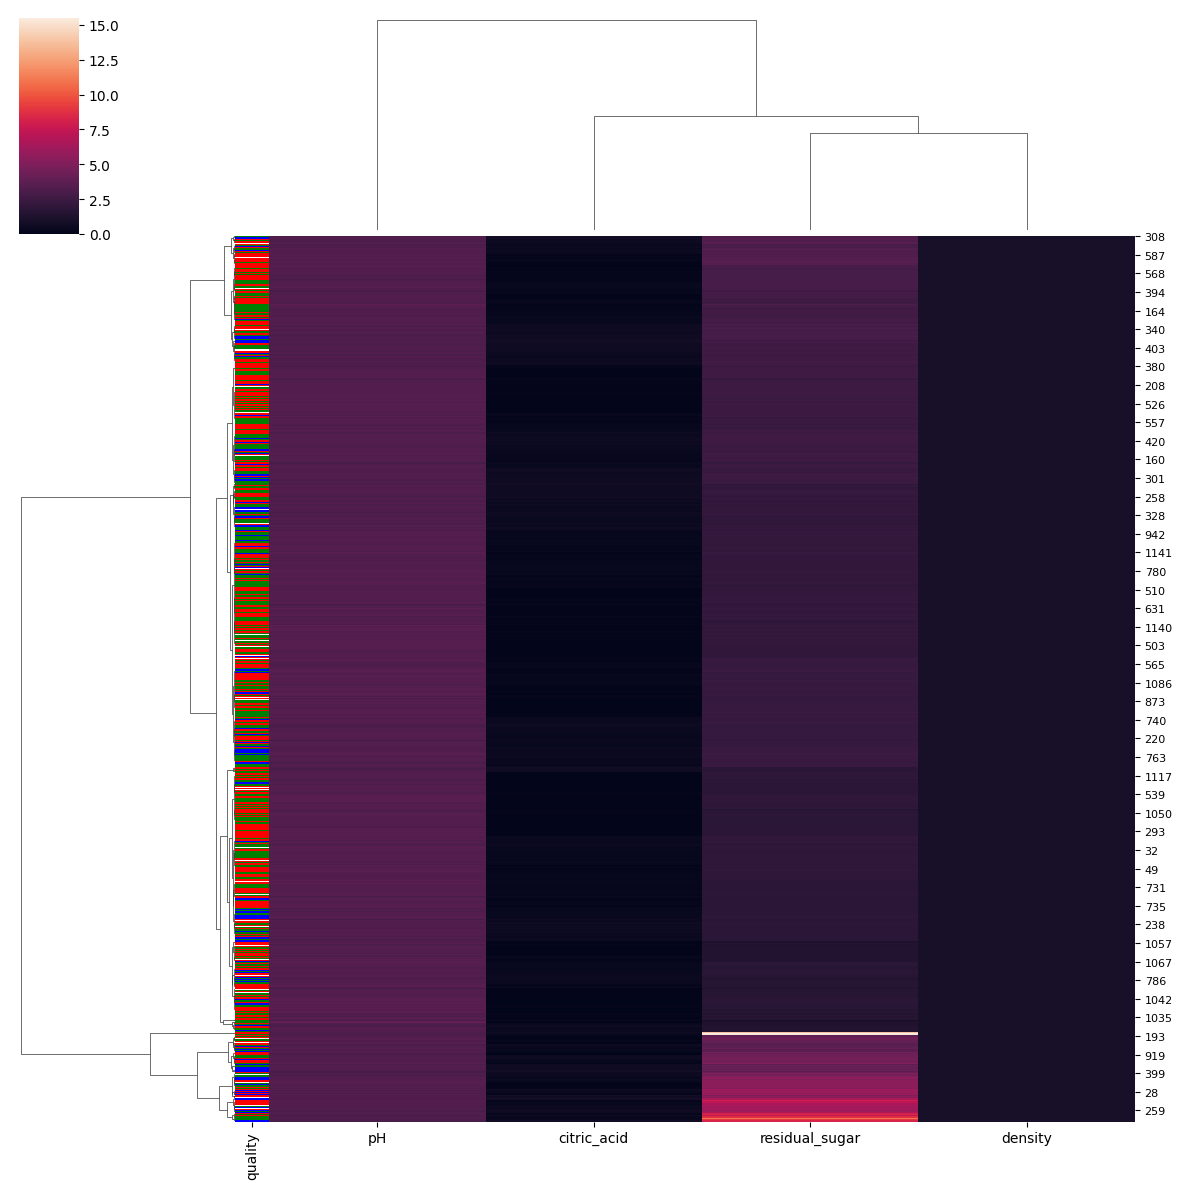

In [175]:
df = data.loc[:,["pH","citric_acid","residual_sugar","density"]]
df1 = data.quality
x = dict(zip(df1.unique(),"rgb"))
row_colors = df1.map(x)
cg = sns.clustermap(df,row_colors=row_colors,figsize=(12, 12),metric="correlation")
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(),rotation = 0,size =8)
plt.show()